# PREPROCESSING



[See proyect](https://docs.google.com/presentation/d/1sop7FFY0EzIWnD0_ExcNTRC9M86hNef1z3XeX2xgchQ/edit?usp=sharing)
<hr/>

<br>

Here we prepare data in order to build dataframes.

We have a **first set** of raw files that contain *features* [F] and *taget* [T] ready to be massaged in order to get the train-test dataframe.
<br>
A **second set** of raw files need to be processed in order to build a **business case** where to apply our algorithm.

**First set** contains:
* PV_geodata.csv [F]
* R_geodata.csv [F]
* PV_R_feature_comercios.csv [F]
* PVR_observaciones.csv [T]

**Second set** contains:
* DAM_geodata.csv
* DAM_geodata_features_comercios.csv

<hr/>

<br>

**GEODATA**
<br>

These files contains *features*  (=GEODATA). It's a collection geographic data containing *demographic* and *land-use* data extracted from different sources: INDEC, Municipalidad de Ciudad de Mendoza.
Columns are the followings:....................

<br>

**COMERCIOS**
<br>

These files contains data from a geospatial layer of comercial land use. Every waypoint in features and target data has a value of comercial density, in order to express the effect of comercial areas.

**OBSERVACIONES**
<br>

Here we have the *target* column. This one contains around 800 observations of 77 *reciclyng spots* sparsed in the territory. This observations are structured in two parameters: composition and quantity of recicling matherials. These two are combined in order to build a quality indicator. Each observation is a line in the file and represents a  *reciclyng spot* + *date/time stamp*. 
<br>

As we detected in a quick view, an statistical approach is needed in order to understand the *probability distribution*. Based on this diagnosis, we could need some data adjustements in this stage to improve the data consistency.

<hr/>

<br>


In [126]:
# libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.close("all")

import seaborn as sns



In [ ]:
# libraries

import pandas as pd

import matplotlib.pyplot as plt
plt.close("all")

In [2]:

#FEATURES
pv_raw = pd.read_csv ('../data/raw/PV_geodata.csv')
r_raw = pd.read_csv ('../data/raw/R_geodata.csv')
pvr_commerce_raw = pd.read_csv ('../data/raw/PVR_feature_comercios.csv')

#BUSINESS CASE
dam_geodata_raw = pd.read_csv ('../data/raw/DAM_features.csv')

## Data preparation

### Features

In [3]:
# Building test-train dataframe

print(f' pv_raw has {pv_raw.shape[1]} columns')
print(f' r_raw has {r_raw.shape[1]} columns')

 pv_raw has 25 columns
 r_raw has 25 columns


In [4]:
# Basic statistics
pv_raw.describe()

,punto_numero,link,poblacion_total,hogares,desocupados,0-14,65_mas,inicial,primario,egb,...,universitario,post_universitario,lee_y _esc,NoLee_ni_e,hacinamiento,sin_red_agua,sin_cloaca,densidad_comercios,x,y
count,34.000000,3.400000e+01,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,...,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,19.617647,5.000706e+08,684.029412,238.117647,22.911765,118.205882,105.147059,19.588235,121.676471,32.058824,...,212.294118,14.941176,629.735294,26.647059,1.735294,0.294118,1.588235,39.647059,-68.850262,-32.883359
std,11.203394,3.689348e+02,295.886801,78.463566,15.909531,97.670373,40.989380,15.825024,142.517563,28.227368,...,102.049759,8.549114,253.795588,26.092937,4.114342,0.798841,4.185962,60.169902,0.015055,0.011559
min,1.000000,5.000701e+08,12.000000,1.000000,0.000000,1.000000,0.000000,0.000000,3.000000,0.000000,...,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-68.903180,-32.902260
25%,10.250000,5.000703e+08,477.250000,193.000000,11.000000,58.250000,80.500000,10.250000,44.000000,12.000000,...,159.250000,11.000000,450.500000,14.000000,0.000000,0.000000,0.000000,5.000000,-68.855288,-32.891198
50%,19.500000,5.000707e+08,660.000000,252.000000,18.000000,86.500000,108.000000,16.000000,68.000000,24.500000,...,201.500000,14.500000,615.000000,18.500000,0.000000,0.000000,0.000000,16.500000,-68.847305,-32.884360
75%,28.750000,5.000709e+08,870.500000,284.000000,30.000000,167.750000,131.500000,26.000000,129.250000,42.750000,...,282.500000,22.000000,814.750000,34.500000,1.000000,0.000000,2.000000,45.750000,-68.841410,-32.873658
max,39.000000,5.000713e+08,1376.000000,375.000000,67.000000,429.000000,195.000000,73.000000,613.000000,140.000000,...,382.000000,36.000000,1157.000000,116.000000,20.000000,3.000000,23.000000,298.000000,-68.825802,-32.862920


In [5]:
# Basic statistics
r_raw.describe()

,punto_numero,link,poblacion_total,hogares,desocupados,0-14,65_mas,inicial,primario,egb,...,universitario,post_universitario,lee_y _esc,NoLee_ni_e,hacinamiento,sin_red_agua,sin_cloaca,densidad_comercios,x,y
count,40.000000,4.000000e+01,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,...,40.00000,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000,40.000000,40.000000
mean,21.950000,5.000916e+08,627.925000,222.300000,21.175000,102.200000,97.450000,17.075000,110.275000,28.150000,...,201.80000,15.225000,580.200000,24.025000,1.550000,2.02500,1.125000,25.225000,-68.847067,-32.882730
std,12.653063,9.266634e+04,261.332815,70.324231,22.090591,80.920727,31.923747,11.730712,120.955594,23.557404,...,103.73739,11.667372,230.573221,20.399205,3.973954,10.43782,2.126602,23.650758,0.012169,0.011709
min,1.000000,5.000701e+08,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,0.000000,...,1.00000,0.000000,3.000000,1.000000,0.000000,0.00000,0.000000,0.000000,-68.883350,-32.902730
25%,11.750000,5.000703e+08,441.750000,167.750000,9.750000,50.000000,80.750000,10.000000,41.750000,12.000000,...,157.00000,8.750000,426.750000,13.000000,0.000000,0.00000,0.000000,6.000000,-68.854327,-32.890738
50%,22.000000,5.000706e+08,563.000000,238.000000,14.000000,86.500000,102.500000,15.000000,69.500000,19.000000,...,195.50000,14.000000,528.000000,17.500000,0.000000,0.00000,0.000000,18.500000,-68.845245,-32.884170
75%,32.250000,5.000709e+08,773.500000,274.250000,23.250000,108.250000,117.500000,21.000000,116.000000,33.250000,...,236.00000,18.000000,735.000000,26.000000,1.000000,0.00000,2.000000,36.750000,-68.840940,-32.872617
max,43.000000,5.004904e+08,1259.000000,351.000000,107.000000,361.000000,154.000000,53.000000,517.000000,103.000000,...,576.00000,66.000000,1120.000000,90.000000,19.000000,66.00000,11.000000,75.000000,-68.821200,-32.862300


In [6]:
pv_raw.sample(5)

,punto_numero,punto_nombre,punto_tipo,link,poblacion_total,hogares,desocupados,0-14,65_mas,inicial,...,universitario,post_universitario,lee_y _esc,NoLee_ni_e,hacinamiento,sin_red_agua,sin_cloaca,densidad_comercios,x,y
29,33,Escuela Mitre,San Juan 417,500070803,1020,358,41,192,91,30,...,342,16,941,33,0,0,1,47,-68.839030,-32.898750
10,11,Plaza Mathons,Jorge Newbery 450-402,500070604,620,215,17,101,103,16,...,189,15,577,22,1,0,0,7,-68.852070,-32.873470
20,21,Arístides y Paso de Los Andes,Arístides y Paso de Los Andes,500070510,767,284,25,81,136,16,...,379,24,732,18,1,0,0,55,-68.858950,-32.891240
33,39,Virgen del Carmen,Virgen del Carmen,500070801,562,164,17,106,53,21,...,223,14,510,25,0,0,2,4,-68.844742,-32.898155
21,22,Arístides y Olascoaga,Arístides y Olascoaga,500070904,700,282,17,80,121,19,...,382,26,658,21,0,0,0,64,-68.854690,-32.892530


* In **pv_raw**, column *punto_tipo* has an error. We will replace all values by 'PV'.
* In **r_raw** we must replace 'Rulero' by 'R'.
* We need to create a key-value field for pv-r, so we create ID by concatenating *punto_tipo* + *punto_numero*

In [7]:
pv_raw['punto_tipo'] = 'PV'
r_raw['punto_tipo'] = 'R'

In [ ]:
r_raw.sort_index(axis= 0, ascending=True)
pv_raw.sort_index(axis= 0, ascending=True)

Dataframe merging.

In [9]:
frames = [pv_raw,r_raw]

pvr_raw = pd.concat(frames)

In [ ]:
# creating ID field
pvr_raw['punto_numero'] = pvr_raw['punto_numero'].astype(str)
pvr_raw['ID']= pvr_raw['punto_tipo'] + pvr_raw['punto_numero']

Set ID as index.

In [48]:
pvr_raw = pvr_raw.set_index('ID')

Nulls clean up

In [56]:
pvr_raw.isnull().sum()

punto_numero          0
punto_nombre          0
punto_tipo            0
link                  0
poblacion_total       0
hogares               0
desocupados           0
0-14                  0
65_mas                0
inicial               0
primario              0
egb                   0
secundario            0
polimodal             0
superior              0
universitario         0
post_universitario    0
lee_y _esc            0
NoLee_ni_e            0
hacinamiento          0
sin_red_agua          0
sin_cloaca            0
densidad_comercios    0
x                     0
y                     0
dtype: int64

### Just diving into the data

This step can bew skipped.

In [ ]:
pvr_raw[pvr_raw['punto_tipo'].isin(['PV'])].sample(5)

In [ ]:
pd.pivot_table(
    pvr_raw,
    values='poblacion_total', 
    index='punto_numero',
    columns= 'punto_tipo'
)

In [16]:
r_raw.iloc[15:23,:7]

,punto_numero,punto_nombre,punto_tipo,link,poblacion_total,hogares,desocupados
15,18,Irrigacion,Rulero,500070108,668,239,17
16,19,Colegio ICEI,Rulero,500070115,411,192,11
17,19,Chirolas Bar,Rulero,500070504,352,163,10
18,20,Plazoleta Godoy,Rulero,500070506,770,299,10
19,22,Escuela Adventitsa,Rulero,500070512,319,123,6
20,22,Plazoleta Ponce,Rulero,500071310,5,0,0
21,23,Acuario Municipal,Rulero,500070305,266,126,12
22,24,Gutierrez,Rulero,500070402,398,196,13


In [ ]:
r_raw[r_raw['poblacion_total'] > 300]
r_raw.sort_values(by= 'poblacion_total', ascending=False)

## Some feature statistics

In [174]:

# features_list = list(pvr_raw.columns)

interesting_features = [
    #'punto_numero',
    #'punto_nombre',
    #'punto_tipo',
    #'link',
    'poblacion_total',
    'hogares',
    'desocupados',
    '0-14',
    '65_mas',
    'inicial',
    'primario',
    'egb',
    'secundario',
    'polimodal',
    'superior',
    'universitario',
    'post_universitario',
    'lee_y _esc',
    'NoLee_ni_e',
    'hacinamiento',
    'sin_red_agua',
    'sin_cloaca',
    'densidad_comercios',
    #'x',
    #'y'
]

pvr_interesting_features = pvr_raw[interesting_features]

In [162]:
pvr_interesting_features

,poblacion_total,hogares,desocupados,0-14,65_mas,inicial,primario,egb,secundario,polimodal,superior,universitario,post_universitario,lee_y _esc,NoLee_ni_e,hacinamiento,sin_red_agua,sin_cloaca,densidad_comercios
ID,,,,,,,,,,,,,,,,,,,
PV1,848,259,39,190,97,35,124,80,180,50,78,225,22,766,40,1,0,23,0
PV3,878,309,27,123,192,20,115,38,181,41,91,327,36,831,25,0,0,2,5
PV4,1018,346,46,182,195,40,216,27,274,39,137,208,14,922,58,2,0,2,12
PV5,778,239,31,170,82,26,163,55,257,51,57,109,2,705,37,4,0,2,16
PV6,1376,332,67,429,105,73,613,68,359,48,22,30,0,1157,116,20,0,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R39,770,299,10,88,154,12,73,24,140,19,62,380,38,740,14,0,0,2,26
R40,528,188,11,87,102,16,40,24,82,18,47,250,23,487,16,0,0,0,10
R41,699,176,14,60,103,10,194,21,152,12,54,211,15,656,30,0,0,0,36


In [175]:
# need to reset_index in order to normalize dataframe. ID is not an index now.
pvr_stacked = pvr_interesting_features.stack().reset_index() 

In [176]:
pvr_stacked = pvr_stacked.rename(columns= {'level_1': 'feature',0:'value'})

In [177]:
pvr_stacked

,ID,feature,value
0,PV1,poblacion_total,848
1,PV1,hogares,259
2,PV1,desocupados,39
3,PV1,0-14,190
4,PV1,65_mas,97
...,...,...,...
1401,R42,NoLee_ni_e,32
1402,R42,hacinamiento,2
1403,R42,sin_red_agua,0
1404,R42,sin_cloaca,1


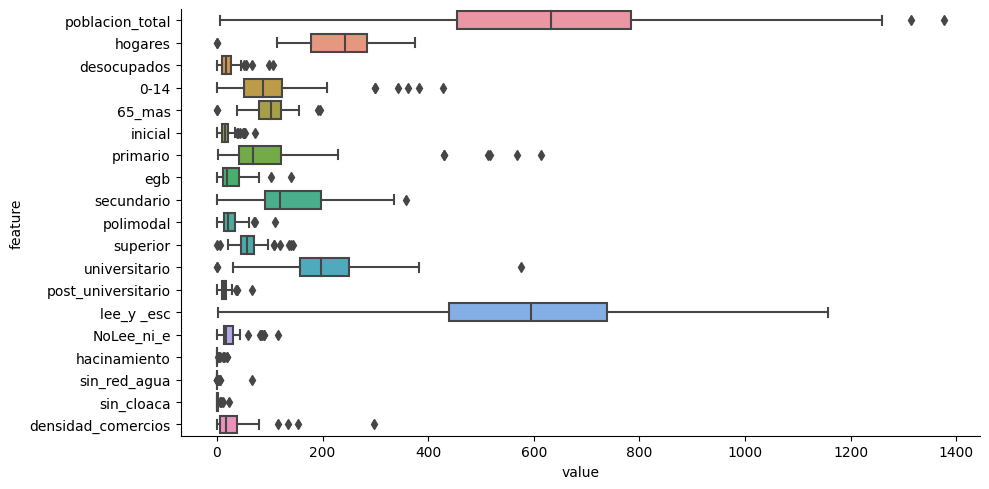

In [166]:
sns.catplot(data= pvr_stacked, x= 'value', y= 'feature', aspect= 0.5*4, kind= "box", orient= "h")

We analize correlation between features. For that purpose we need to go back to pvr_interesting_features.

<Axes: >

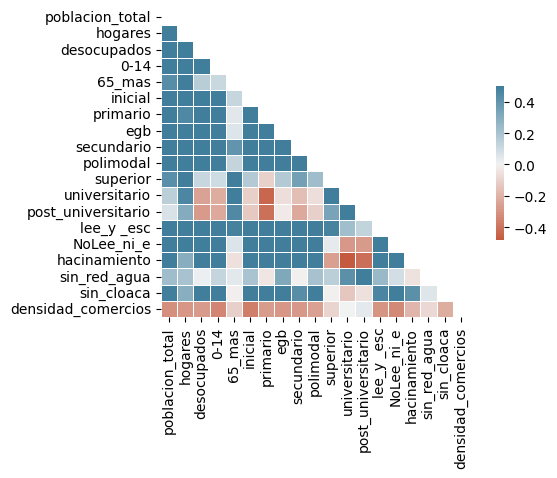

In [223]:
# Compute the correlation matrix
corr = pvr_interesting_features.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(7, 4))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(20, 230, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Observations: 
* Extreme correlation values lower +- 0.5, that indicates an overall weak correlation between features.
* densidad_comercios has mostly negative correlation.
* There is no significative differences beween features and new_features (grouped features)

We go back over columns tryin to group them in a high level category, in order to reduce them.

In [205]:
new_features_dict = {
    #'punto_numero',
    #'punto_nombre',
    #'punto_tipo',
    #'link',
    'poblacion_total': 'demografico_poblacion_total',
    'hogares' :  'demografico_hogares',
    'desocupados' : 'demografico_desocupados',
    '0-14': 'demografico_0-14',
    '65_mas': 'demografico_65_mas',
    'inicial': 'educacion_inicial-primario',
    'primario': 'educacion_inicial-primario',
    'egb' : 'educacion_secundario',
    'secundario': 'educacion_secundario',
    'polimodal': 'educacion_secundario',
    'superior': 'educacion_superior',
    'universitario' : 'educacion_superior',
    'post_universitario' : 'educacion_post-grado',
    'lee_y _esc' : 'educacion_alfabetizacion_SI',
    'NoLee_ni_e' : 'educacion_alfabetizacion_NO',
    'hacinamiento' : 'demografico_hacinamiento',
    'sin_red_agua' : 'infraestructura_sin_red_agua',
    'sin_cloaca' : 'infraestructura_sin_cloaca',
    'densidad_comercios' : 'uso_densidad_comercios',
    #'x',
    #'y'
}



In [206]:
pvr_stacked['new_features'] = pvr_stacked.feature.map(new_features_dict)

In [210]:
pvr_stacked.sample(5)

,ID,feature,value,new_features
1240,R35,inicial,27,educacion_inicial-primario
721,R4,densidad_comercios,9,uso_densidad_comercios
1046,R23,hogares,126,demografico_hogares
357,PV19,hacinamiento,0,demografico_hacinamiento
1132,R27,universitario,275,educacion_superior


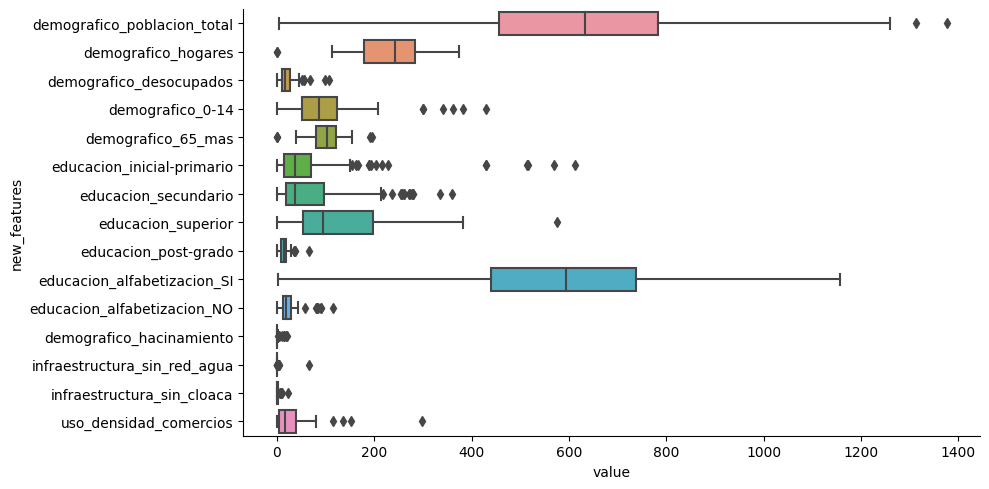

In [211]:
sns.catplot(data= pvr_stacked, x= 'value', y= 'new_features', aspect= 0.5*4, kind= "box", orient= "h")

In [212]:
pvr_new_features_pivot = pd.pivot_table(pvr_stacked, values='value', index= ['ID'],columns=['new_features'])

<Axes: xlabel='new_features', ylabel='new_features'>

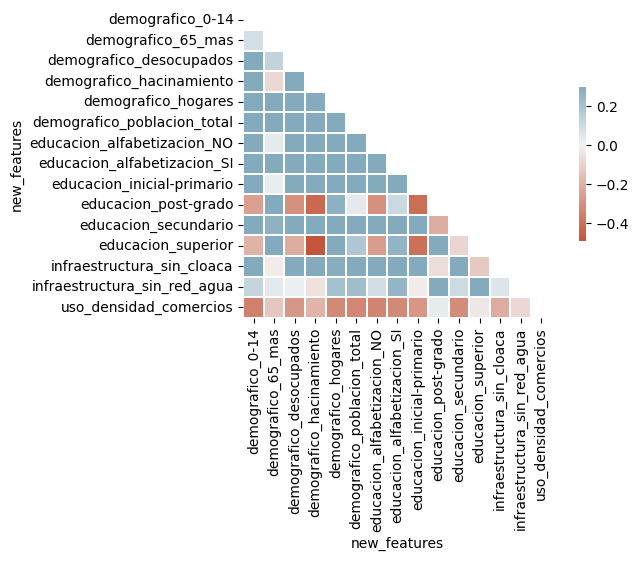

In [224]:
# Compute the correlation matrix
corr = pvr_new_features_pivot.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(7, 4))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(20, 230, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.2, cbar_kws={"shrink": .5})

Observations: 
* Extreme correlation values lower +- 0.5, that indicates an overall weak correlation between features.
* densidad_comercios has mostly negative correlation.

<hr/>

### Target

I will need to:
* Do columns statistics
* Reshape data (sample space)
* Agreggate data grouping by ID

### Data cleaning

In [268]:
#TARGET
pvr_quality_raw = pd.read_csv ('../data/raw/PVR_observaciones.csv')

In [269]:
pvr_quality_raw.dtypes

Index                                       int64
ID                                         object
Tipo de punto                              object
Numero                                      int64
Clasificacion                              object
ClasificacionNum                          float64
TipoResiduo                                object
Cantidad                                   object
CantidadNum                               float64
żSe realiza recolección en el momento?     object
Calidad (grupos)                           object
dtype: object

In [271]:
pvr_quality_raw.head(5)

,Index,ID,Tipo de punto,Numero,Clasificacion,ClasificacionNum,TipoResiduo,Cantidad,CantidadNum,żSe realiza recolección en el momento?,Calidad (grupos)
0,1,PV11,Punto Verde,11,Buena,1.0,Papel,Medio,2.0,Sí,Buena
1,2,PV11,Punto Verde,11,Buena,1.0,"Vidrio, Metal, Tetra",Medio,2.0,Sí,Buena
2,3,PV11,Punto Verde,11,Buena,1.0,Plástico,Medio,2.0,Sí,Buena
3,4,PV7,Punto Verde,7,Buena,1.0,Papel,Alto,3.0,Sí,Buena
4,5,PV7,Punto Verde,7,Buena,1.0,"Vidrio, Metal, Tetra",Alto,3.0,Sí,Buena


In [265]:
cols_interest = [
    #'Index', 
    'ID',
    #'Tipo de punto', 
    #'Numero', 
    'Clasificacion',
    'ClasificacionNum', 
    #'TipoResiduo', 
    'Cantidad', 
    #'CantidadNum',
    #'żSe realiza recolección en el momento?', 
    #'Calidad (grupos)'
    ]

    #['ID', 'Clasificacion','ClasificacionNum','Cantidad', 'CantidadNum']

In [284]:
pvr_quality = pvr_quality_raw[['ID', 'Clasificacion','ClasificacionNum','Cantidad', 'CantidadNum']]


In [288]:
pvr_quality.sample(5)

,ID,Clasificacion,ClasificacionNum,Cantidad,CantidadNum
62,PV23,Regular,2.0,Medio,2.0
733,R29,Buena,1.0,Medio,2.0
296,PV14,Buena,1.0,Medio,2.0
794,R36,Buena,1.0,Medio,2.0
502,PV11,Regular,2.0,Medio,2.0


In [286]:
print(f' Clasificacion contiene {pd.unique(pvr_quality.Clasificacion)}')
print(f' ClasificacionNum contiene {pd.unique(pvr_quality.ClasificacionNum)}')
print(f' Cantidad contiene {pd.unique(pvr_quality.Cantidad)}')
print(f' CantidadNum contiene {pd.unique(pvr_quality.CantidadNum)}')


 Clasificacion contiene ['Buena' 'Regular' 'Mala']
 ClasificacionNum contiene [1. 2. 3.]
 Cantidad contiene ['Medio' 'Alto' 'Bajo' 'Nulo']
 CantidadNum contiene [ 2.  3.  1. nan]


Based on these values we need to build a quality index for every observation (index).
Is very important to understand the sample space resultant of the combinatories of ClasificationNum and CantidadNum, and make the correct decisions in order to build a desired probability distribution.
Having a matrix with values [[ClasificationNum 1,2,3], [CantidadNum 0,1,2,3]] we know that the resultant combinatories should consider the order of factors and all elements. That's why we are goingt to build combinatories under the Permutation method.
<br/>

* **What is the resultant sample space?**
* **What kind of distribution do we need to build?**
<br/> 
Is the same quality [[ClasificationNum 1] x [CantidadNum 2]] than [[ClasificationNum 2] x [CantidadNum 1]].

* **How can we build a uniform probability distribution with ClasificationNum and CantidadNum?**